# Student Performance Indicator 

### Life Cycle of Machine Learning Project

`1.Understanding the problem statement`   
`2.Data Collection`  
`3.Data Checks to perform`  
`4.Exploratory Data analysis`  
`5.Data Pre-Processing`  
`6.Model Traaining`  
`7.Choose best model`  

### 1. Problem Statement
`this project understand how the student's performance(test score) is affected by
other variables such as Gender,Ethnicity,Parental level of education,Lunch  and 
Test Preparation course`  

### 2. Data Collection

**Dataset Sourse**  = https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

`The Data consists 8 column and 1000 rows`

### 2.1 Import data and Required Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
## import the csv in Pandas Data Frame
df = pd.read_csv('data/stud.csv')

In [7]:
#show top 5 records 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#shape of the dataset
df.shape

(1000, 8)

### 2.2 Dataset Information

`gender  : sex of the student (Male/Female)`  
`race/ethnicity : ethnicity of students -> (Group A,B,&C)`  
`parental_level_of_education : Education of the Parents of the perticulr Students`  
`lunch : Having lunch before test(Standard or Free/reduced)`  
`test_preparation_course : complete or not complete before test`  
`math score`  
`reading_score`  
`writing_score`   

### 3. data Checks  to Perform

`Check Missing Values`  
`Check Duplictes`  
`Check datatypes`  
`Check the number of unique values of each column`  
`Check statistics of data set`  
`Check various categories present in the different categorical column`

 ### 3.1 Check Missing Values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Observation :
`There are no Missing values in dataset`

### 3.2 Check the Duplicate values

In [10]:
df.duplicated().value_counts()

False    1000
dtype: int64

#### Observation : There are no duplicated values in dataset

## 3.3 Check data Type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Observation
`here we can clearly see that all the columns are in correct data type`

### 3.4 Check the number of unique values of each column

In [12]:
for i in df.select_dtypes('object').columns:
    print(i,'has',df[i].nunique(),'unique values')

gender has 2 unique values
race_ethnicity has 5 unique values
parental_level_of_education has 6 unique values
lunch has 2 unique values
test_preparation_course has 2 unique values


### 3.5 Check statistics of data set

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observation
`from above Description of numerical data all the means are very close to each other`  
`All std are very close to each other`  
`for the math_score min = 0 , for the reading_score min = 17 and for the writing_score`     min=10``

### 3.6 Check various categories present in the different categorical column

In [14]:
for i in df.select_dtypes('object').columns:
    print(i,'has',df[i].nunique(),'unique values',df[i].unique())

gender has 2 unique values ['female' 'male']
race_ethnicity has 5 unique values ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education has 6 unique values ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch has 2 unique values ['standard' 'free/reduced']
test_preparation_course has 2 unique values ['none' 'completed']


### Define Numerical and Categorical Columns

In [15]:
numerical_columns = df.select_dtypes('number').columns
categorical_columns = df.select_dtypes('object').columns

print('we have',len(numerical_columns),'numerical_columns: ',numerical_columns.tolist() )
print('we have',len(categorical_columns),'categorical_columns: ',categorical_columns.tolist())

we have 3 numerical_columns:  ['math_score', 'reading_score', 'writing_score']
we have 5 categorical_columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding columns for `Total score` and `Average`

In [16]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
full_math_score = df[df['math_score']==100]['gender'].count()
full_reading_score = df[df['reading_score']==100]['gender'].count()
full_writing_score = df[df['writing_score']==100]['gender'].count()

print('Number Of Stundents getting Full marks in Maths :',full_math_score)
print('Number Of Stundents getting Full marks in reading :',full_reading_score)
print('Number Of Stundents getting Full marks in writing :',full_writing_score)

Number Of Stundents getting Full marks in Maths : 7
Number Of Stundents getting Full marks in reading : 17
Number Of Stundents getting Full marks in writing : 14


In [18]:
maths_less_20 = df[df['math_score']<20]['gender'].count()
reading_less_20 = df[df['reading_score']<20]['gender'].count()
writing_less_20 = df[df['writing_score']<20]['gender'].count()

print('Number Of Stundents getting marks less then 20 in Maths :',maths_less_20)
print('Number Of Stundents getting marks less then 20 in reading :',reading_less_20)
print('Number Of Stundents getting marks less then 20 in writing :',writing_less_20)

Number Of Stundents getting marks less then 20 in Maths : 4
Number Of Stundents getting marks less then 20 in reading : 1
Number Of Stundents getting marks less then 20 in writing : 3


### Observation

`From the above study we can say that students performance worst in maths`   
`Best performance in reading section`

### 4.Visualization 

#### 4.1 Visulize Average score & Total score  distribution to make some conclusion

`Histogram`

`KDE`

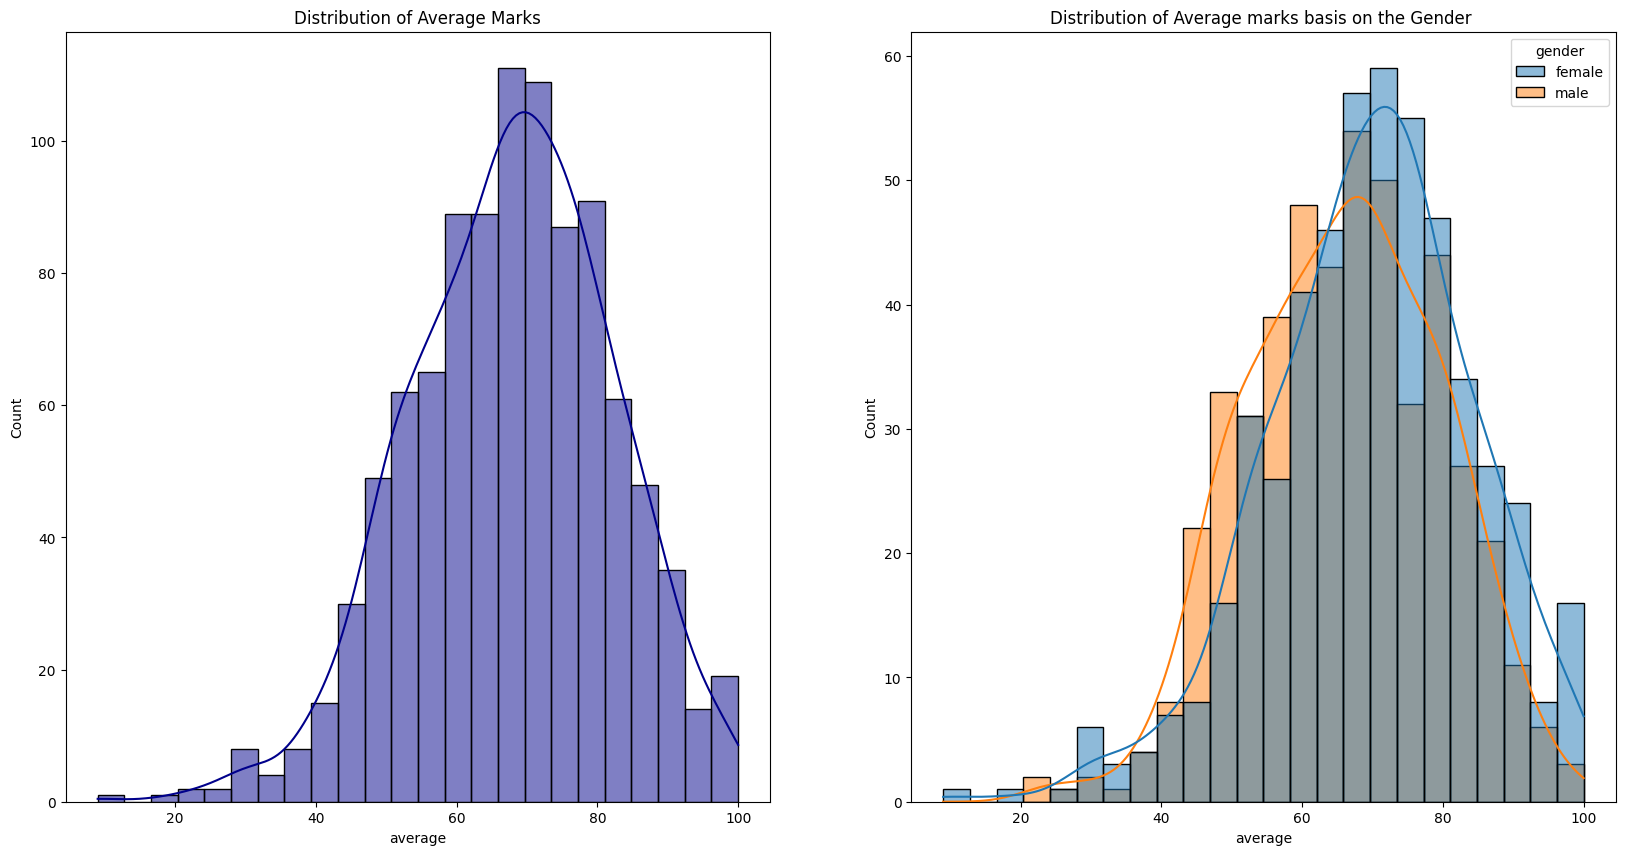

In [19]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='darkblue')
plt.title('Distribution of Average Marks')

plt.subplot(122)
sns.histplot(data=df,x='average',hue='gender',kde=True)
plt.title('Distribution of Average marks basis on the Gender ')

plt.show()

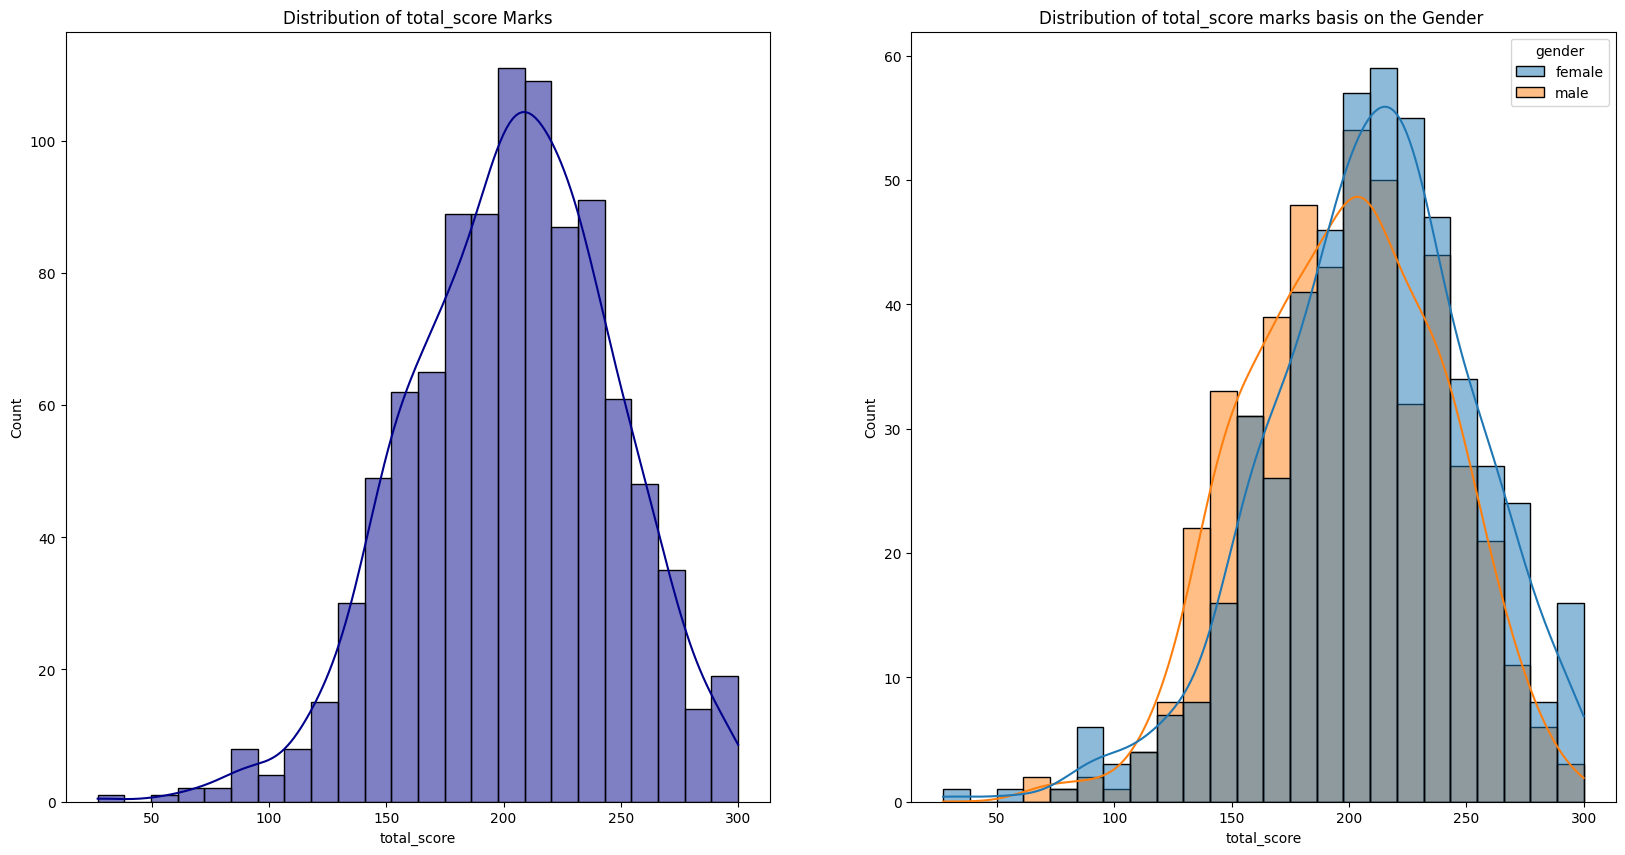

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,color='darkblue')
plt.title('Distribution of total_score Marks')

plt.subplot(122)
sns.histplot(data=df,x='total_score',hue='gender',kde=True)
plt.title('Distribution of total_score marks basis on the Gender ')

plt.show()

#### Observation 
`Female Students tend to perform well than male student`

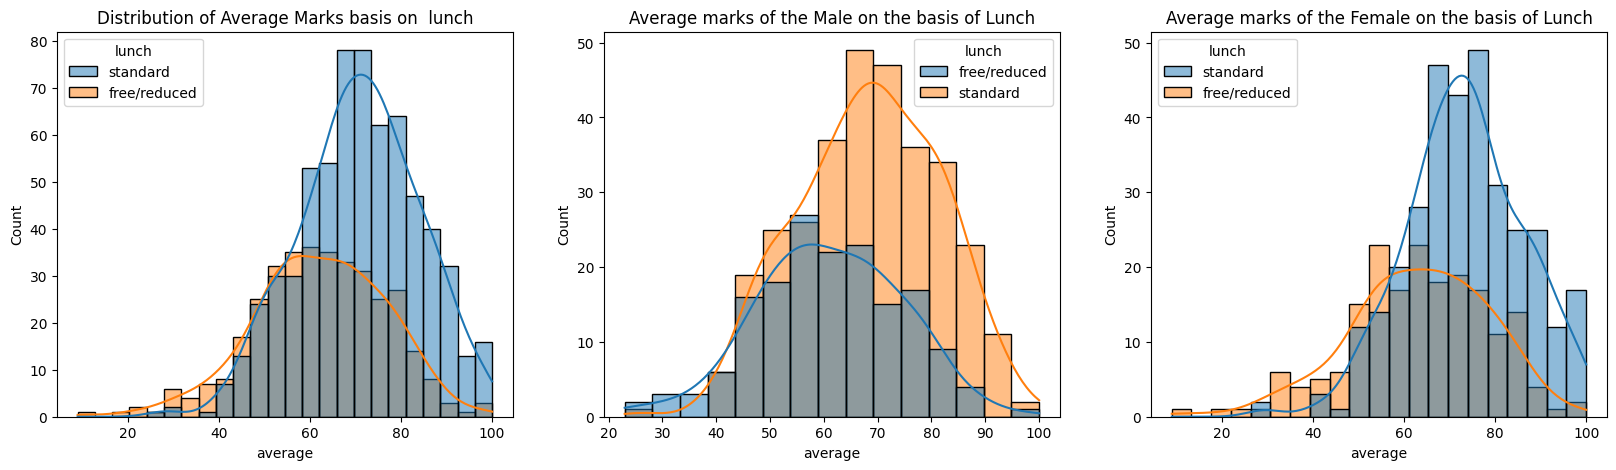

In [21]:
plt.figure(figsize=(20,5))


plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('Distribution of Average Marks basis on  lunch')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.title('Average marks of the Male on the basis of Lunch')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='lunch',kde=True)
plt.title('Average marks of the Female on the basis of Lunch')

plt.show()

#### observation
`standard lunch helps to perform well in exam be it male or female`

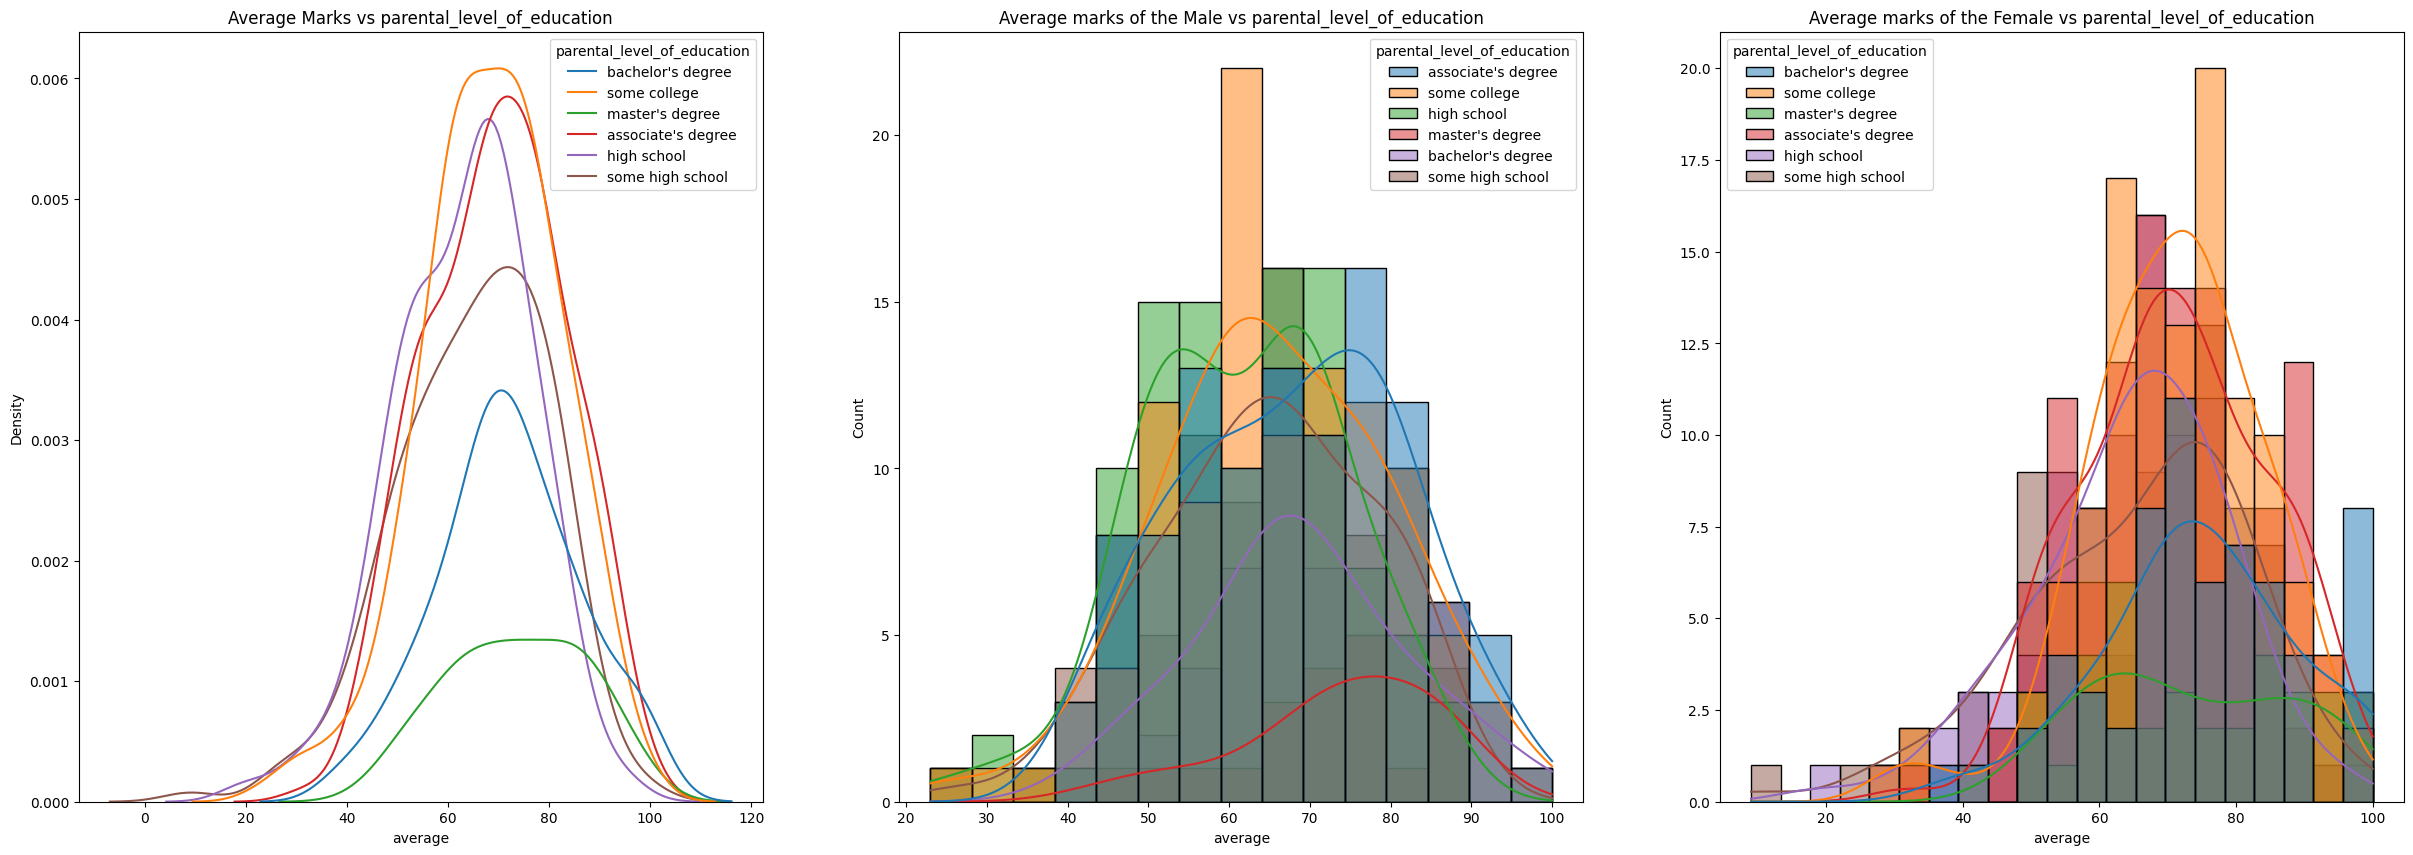

In [22]:
plt.figure(figsize=(30,10))


plt.subplot(131)
sns.kdeplot(data=df,x='average',hue='parental_level_of_education',color='blue')
plt.title('Average Marks vs parental_level_of_education')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Average marks of the Male vs parental_level_of_education')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='parental_level_of_education',kde=True)
plt.title('Average marks of the Female vs parental_level_of_education')

plt.show()

#### Observation 
`1.In general parent's education don't help student perform well in exam`  
`2.Second plot shows that parent's whose education is associate's degree 
or master's degree their male child tend to perform well in exam`  
`3.Third plot shows that there is no effect of parent's education on female studentsm`

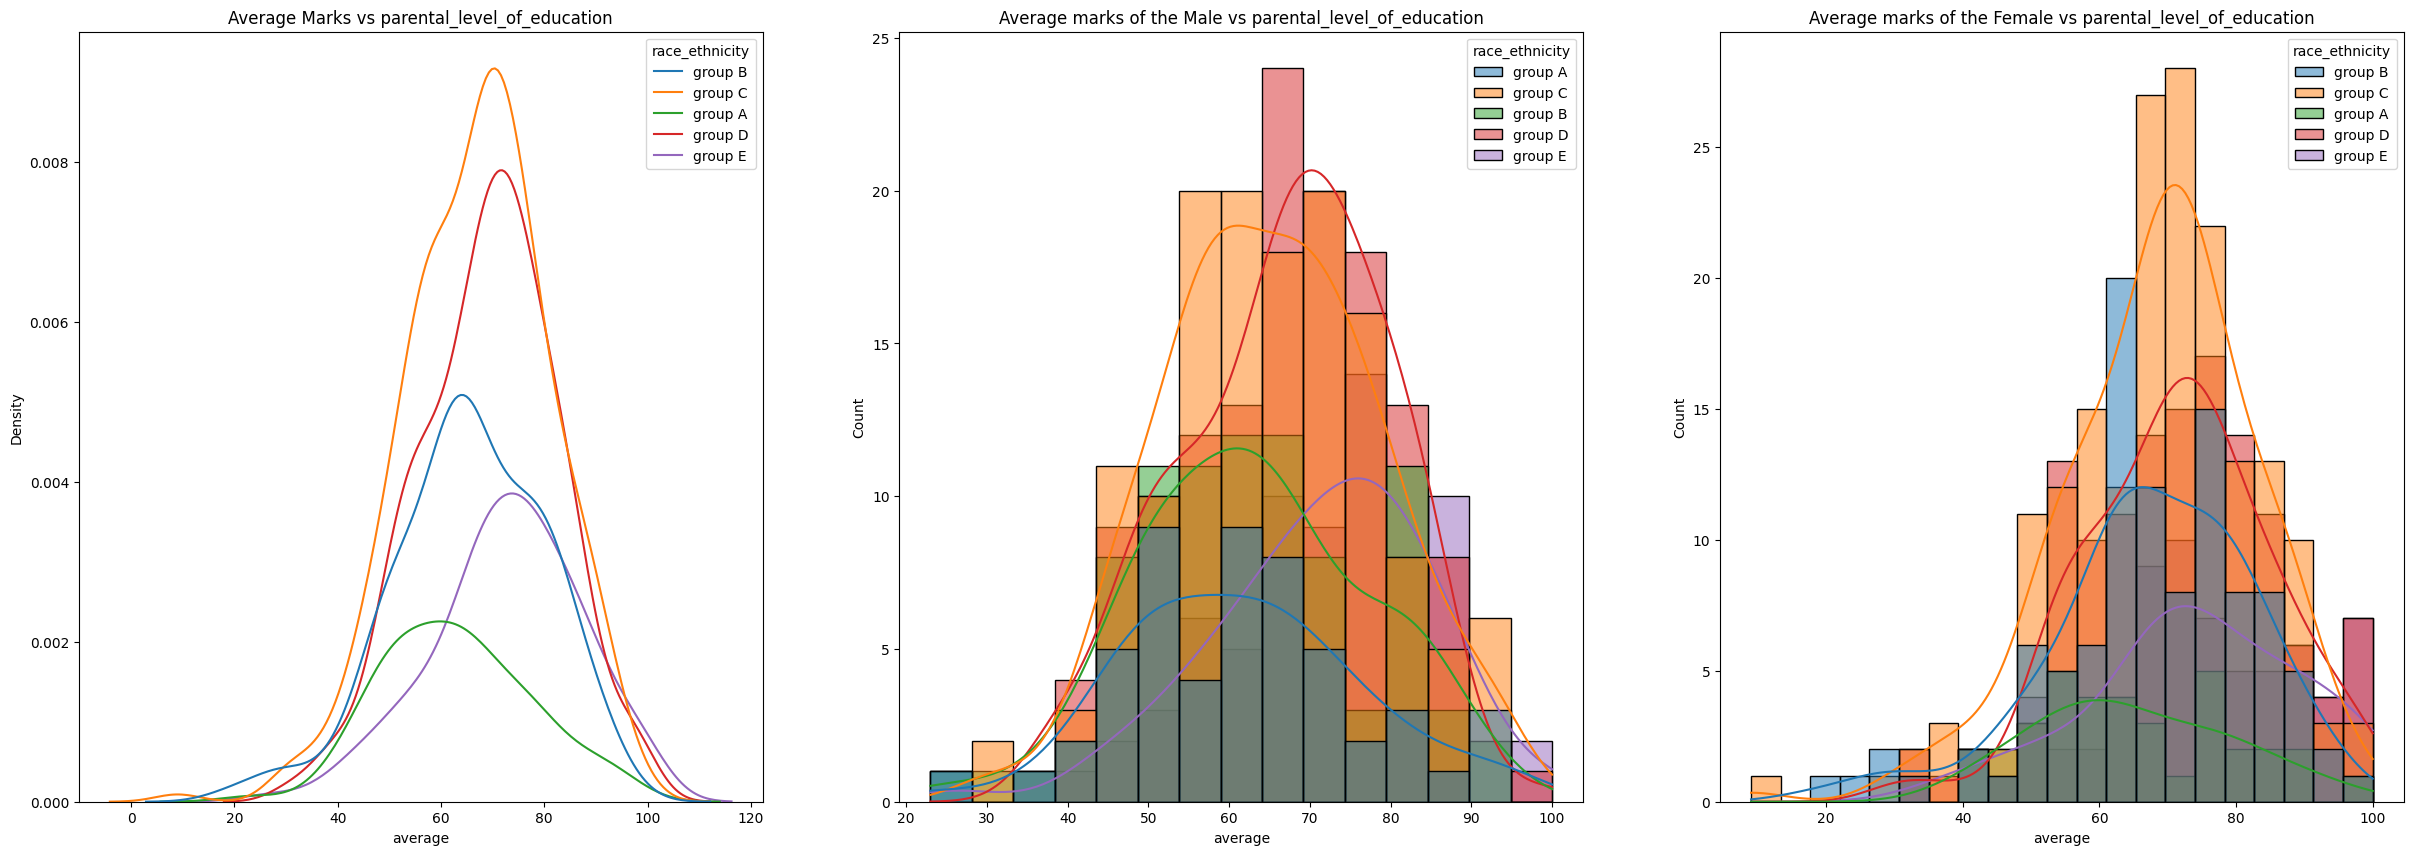

In [23]:
plt.figure(figsize=(30,10))


plt.subplot(131)
sns.kdeplot(data=df,x='average',hue='race_ethnicity',color='blue')
plt.title('Average Marks vs parental_level_of_education')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Average marks of the Male vs parental_level_of_education')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='race_ethnicity',kde=True)
plt.title('Average marks of the Female vs parental_level_of_education')

plt.show()

#### observation
`1.students from Group A and Group B perfor poorly in exam`

### 4.2 Maximum score of students in all three subjects

Text(0.5, 1.0, 'Writing score')

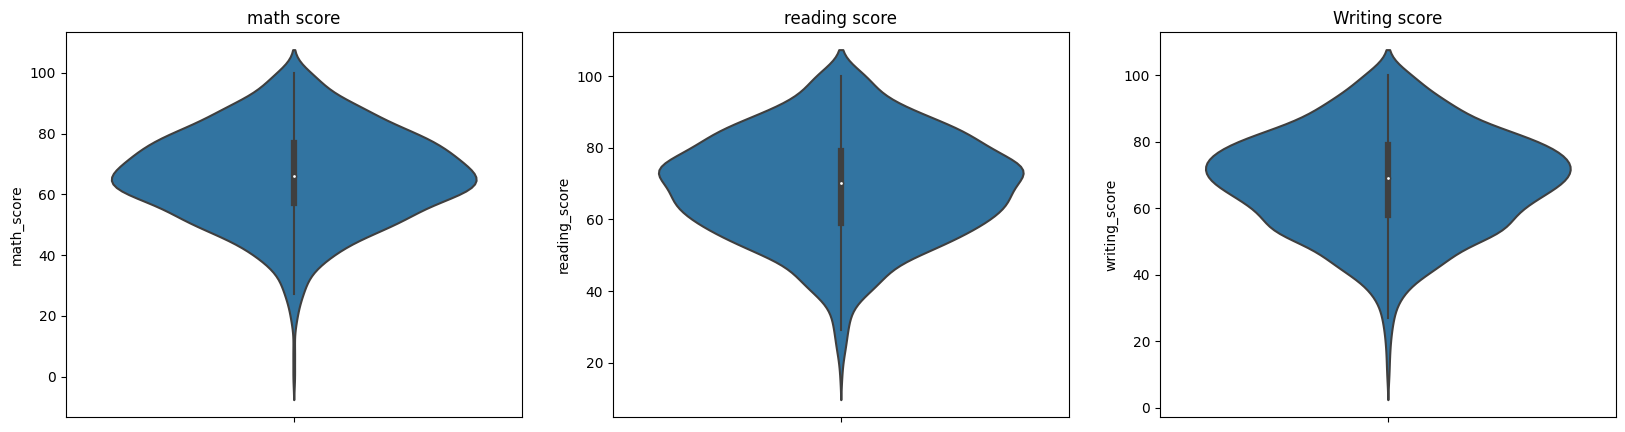

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(data=df,y='math_score')
plt.title('math score')
plt.subplot(132)
sns.violinplot(data=df,y='reading_score')
plt.title('reading score')
plt.subplot(133)
sns.violinplot(data=df,y='writing_score')
plt.title('Writing score')

#### Observation 
`In all the subject the majority students marks lies between 60 to 80`

In [25]:
# 4.3 Multivariate Analysis Using Pieplot

print(df['race_ethnicity'])
print(df['race_ethnicity'].unique())

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race_ethnicity, Length: 1000, dtype: object
['group B' 'group C' 'group A' 'group D' 'group E']


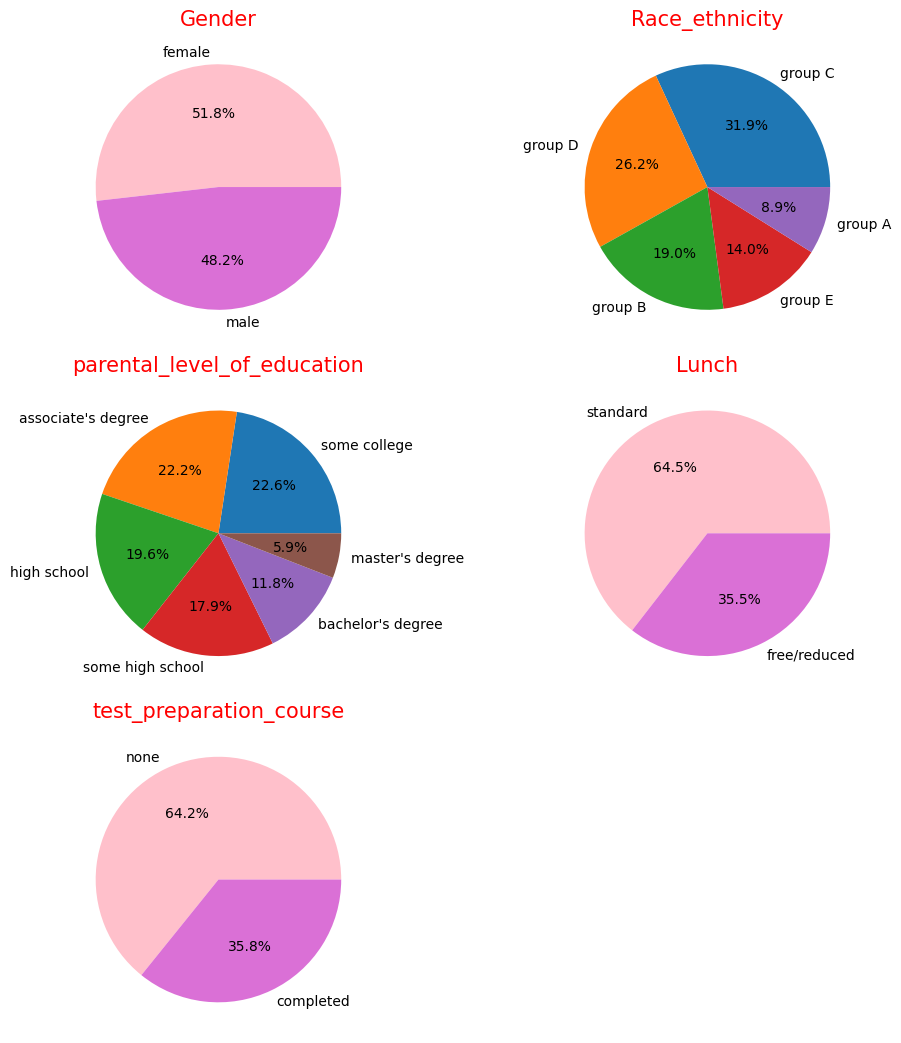

In [26]:
plt.figure(figsize=(10,14))

plt.subplot(421)
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().reset_index()['index'].unique(),autopct='%0.01f%%',colors=['pink','orchid'])
plt.title('Gender',fontdict={'fontsize':15,'color':'red'})

plt.subplot(422)
plt.pie(df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().reset_index()['index'].unique(),autopct='%0.01f%%')
plt.title('Race_ethnicity',fontdict={'fontsize':15,'color':'red'}) 

plt.subplot(423)
plt.pie(df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().reset_index()['index'].unique(),autopct='%0.01f%%')
plt.title('parental_level_of_education',fontdict={'fontsize':15,'color':'red'})

plt.subplot(424)
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].value_counts().reset_index()['index'].unique(),autopct='%0.01f%%',colors=['pink','orchid'])
plt.title('Lunch',fontdict={'fontsize':15,'color':'red'})

plt.subplot(425)
plt.pie(df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().reset_index()['index'].unique(),autopct='%0.01f%%',colors=['pink','orchid'])
plt.title('test_preparation_course',fontdict={'fontsize':15,'color':'red'})

plt.tight_layout()
plt.show()

#### Observation
`1.number of male and female students are almost same`  
`2.Group C has more students`  
`3.Number of students who have standard lunch are greater`  
`4.Number of students who have not enrolled in any test preparation course is greater`  
`5.Number of students whose parental education is "Some College" is greater followed closely by  "Associate degree"`

In [27]:
## 4.4 Feature wise Visualization

### 4.4.1 GENDER COLUMN

`1.How is distribution of Gender?`  
`2.Is gender has any impact on student's performance ?  `

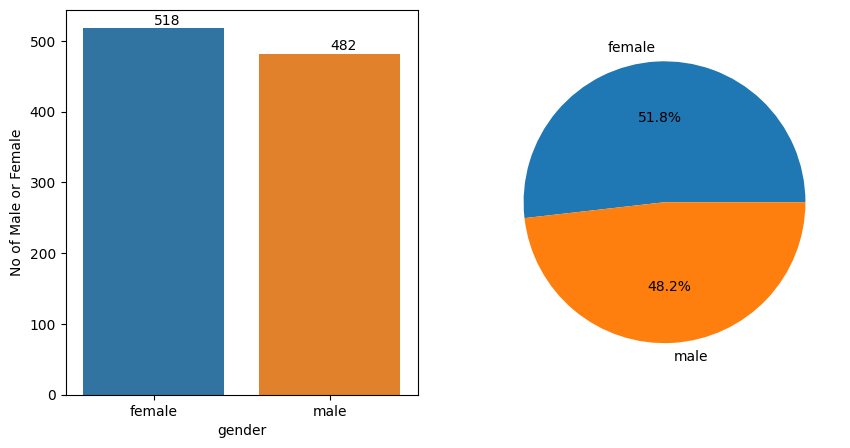

In [28]:
#1.How is distribution of Gender?
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(df['gender'])
plt.ylabel('No of Male or Female')
for i in range(df['gender'].nunique()):
    plt.text(i,df['gender'].value_counts()[i]+5,df['gender'].value_counts()[i])


plt.subplot(122)
plt.pie(df['gender'].value_counts(),autopct='%0.01f%%',labels=df['gender'].unique())
plt.show()

#### observations 

`Gender has balanced data with females students are 518(51.8%) and male students are 482(48.2%)`

In [29]:
#2.Is gender has any impact on student's performance ?
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


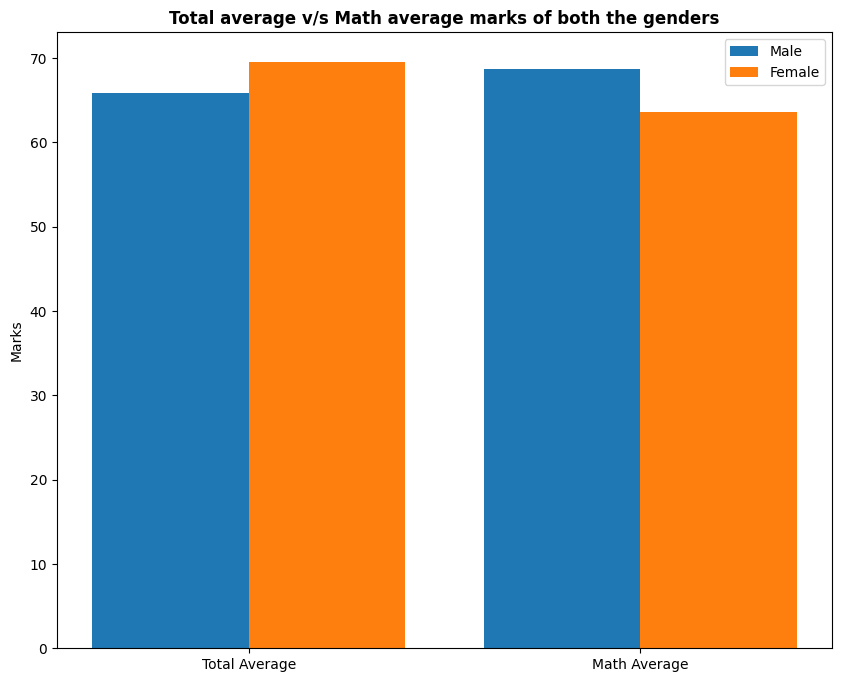

In [30]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Observation
`On an average females have a better overall score than men.`  
`whereas males have scored higher in Maths.`

## 4.4.2 race_ethnicity

`1.How is Group wise distribution?`  
`2.Is race_ethnicity has any impact on student's performance?`

<Figure size 1500x500 with 0 Axes>

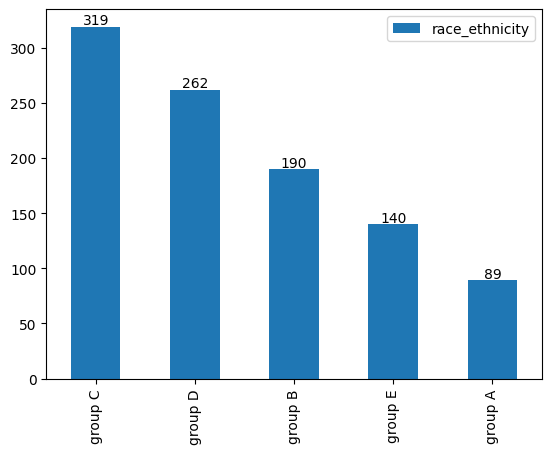

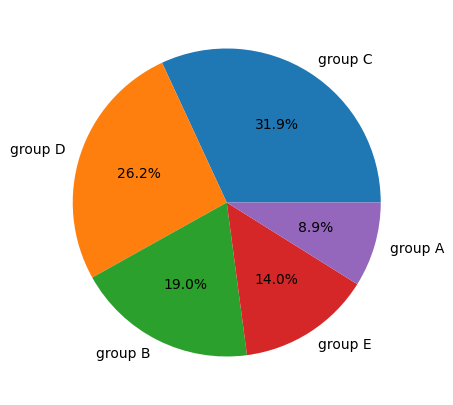

In [31]:
#1.How is Group wise distribution?
plt.figure(figsize=(15,5))

df['race_ethnicity'].value_counts().to_frame().reset_index().plot(kind='bar')
for i in range(df['race_ethnicity'].nunique()):
    plt.text(i,df['race_ethnicity'].value_counts()[i]+2,df['race_ethnicity'].value_counts()[i],ha='center')
plt.xticks([0,1,2,3,4],df['race_ethnicity'].value_counts().to_frame().reset_index()['index'].values)
plt.show()

plt.figure(figsize=(15,5)) 

plt.subplot(122)
plt.pie(df['race_ethnicity'].value_counts(),autopct='%0.01f%%',labels=df['race_ethnicity'].value_counts().to_frame().reset_index()['index'].values)

plt.show()

#### Observation
`1.Most of the student belonging from group C /group D.`   
`2.Lowest number of students belong to groupA.`

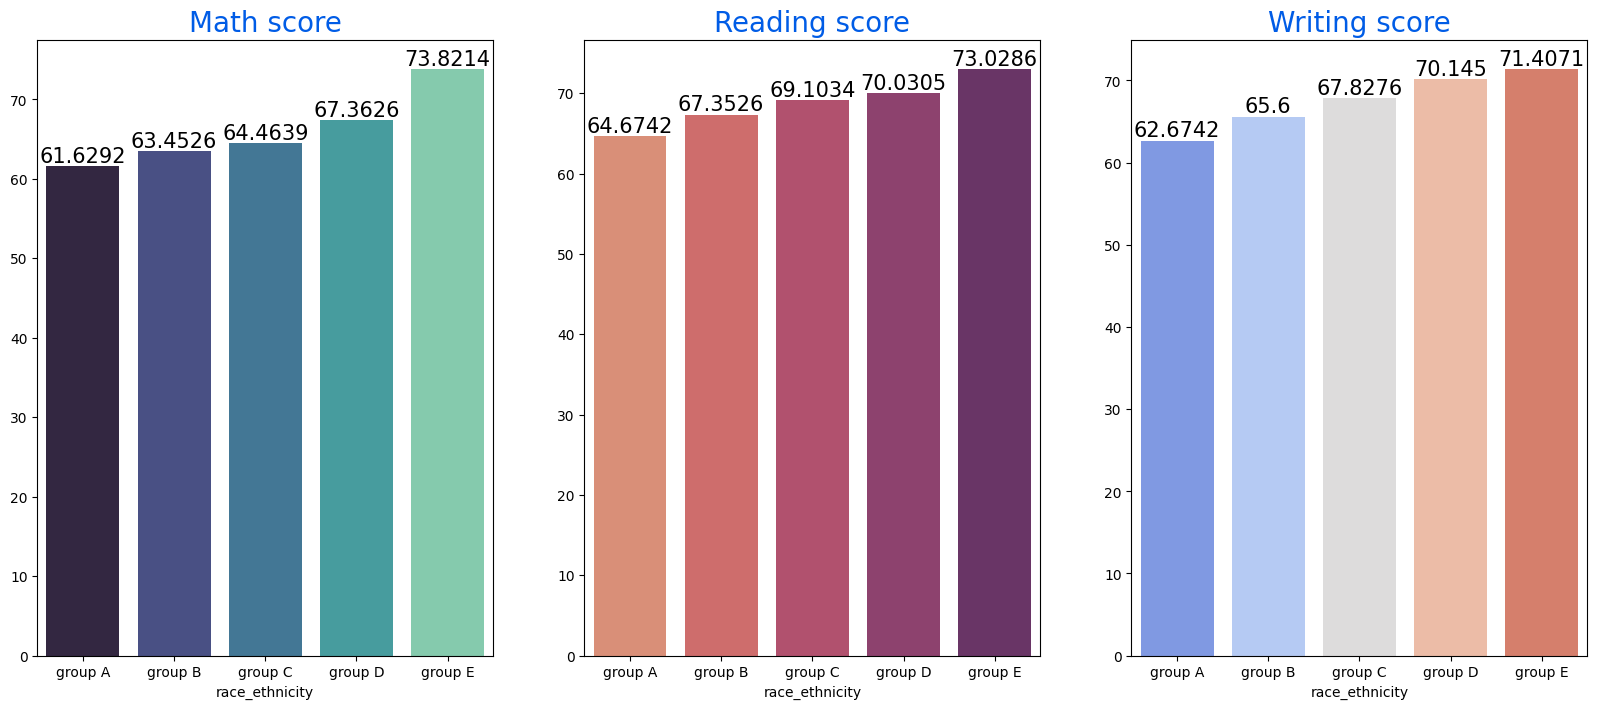

In [32]:
##2.Is race_ethnicity has any impact on student's performance?
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Observation
`1.Group E students have scored the highest marks.`  
`2.Group A students have scored the lowest marks.`  
`3.Students from a lower Socioeconomic status have a lower avg in all course subjects`  


### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

`1.What is educational Background of parents?`  
`2.Is parental education has any impact on student's performance ?`

<Figure size 1000x500 with 0 Axes>

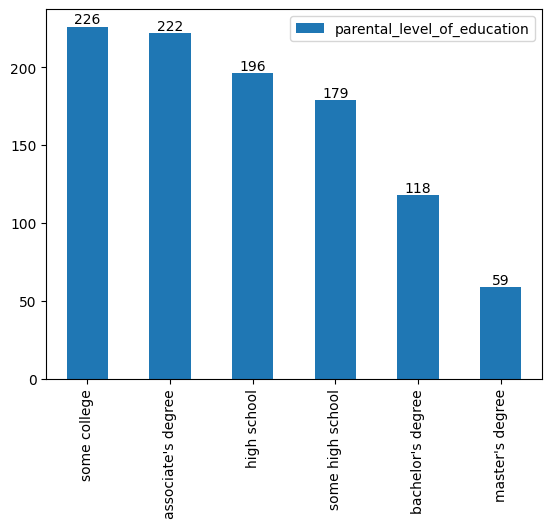

In [33]:
## What is educational Background of parents?
plt.figure(figsize=(10,5))
df['parental_level_of_education'].value_counts().reset_index().plot(kind='bar')
for i in range(df['parental_level_of_education'].nunique()):
    plt.text(i,df['parental_level_of_education'].value_counts()[i]+2,df['parental_level_of_education'].value_counts()[i],ha='center')
plt.xticks([0,1,2,3,4,5],df['parental_level_of_education'].value_counts().reset_index()['index'].unique())
plt.show()

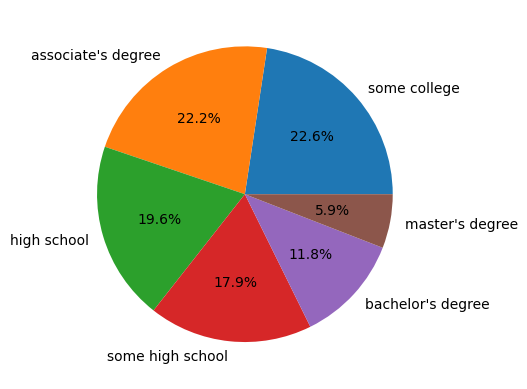

In [34]:
plt.pie(df['parental_level_of_education'].value_counts(),autopct='%0.01f%%',labels=df['parental_level_of_education'].value_counts().reset_index()['index'].unique())
plt.show()

### Observation
`Largest number of parents are from some college.`

### 4.4.4 LUNCH COLUMN¶
`1.Which type of lunch is most common amoung students ?`   
`2.What is the effect of lunch type on test results?`

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

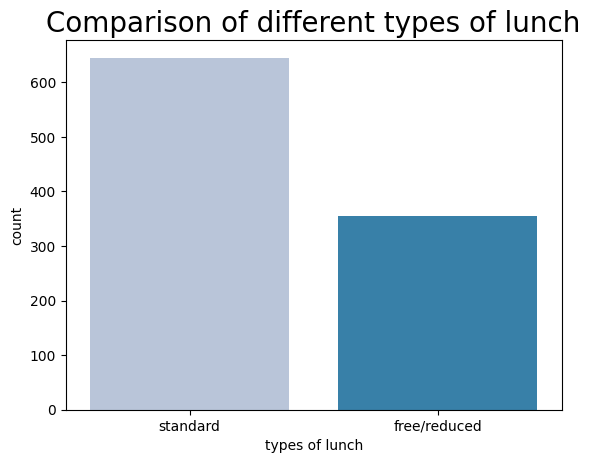

In [35]:
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Observation 
`Students being served Standard lunch was more than free lunch`

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

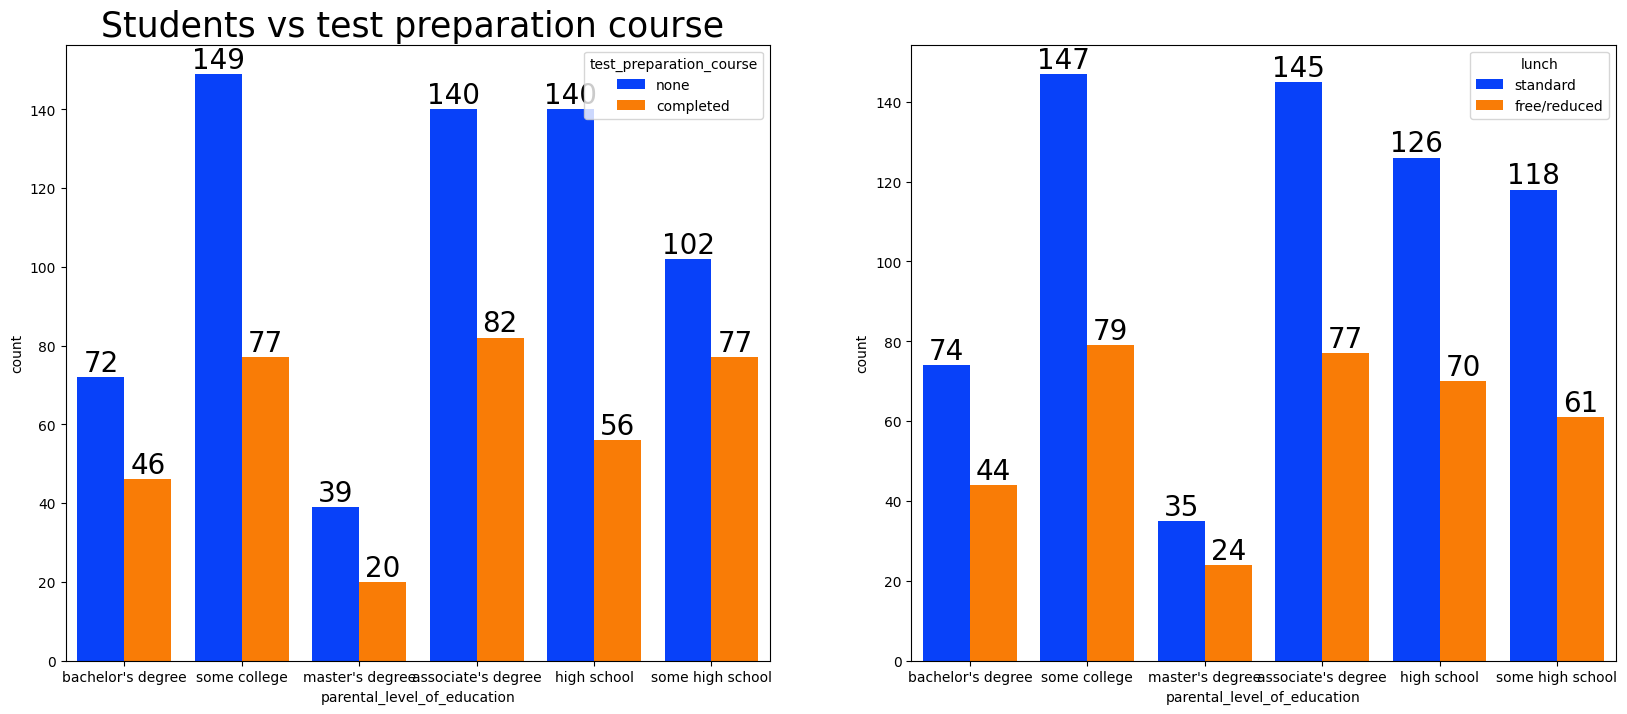

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Observation
`Students who get Standard Lunch tend to perform better than students who got free/reduced lunch`

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
`1.Which type of lunch is most common amoung students ?`  
`2.Is Test prepration course has any impact on student's performance ?`

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

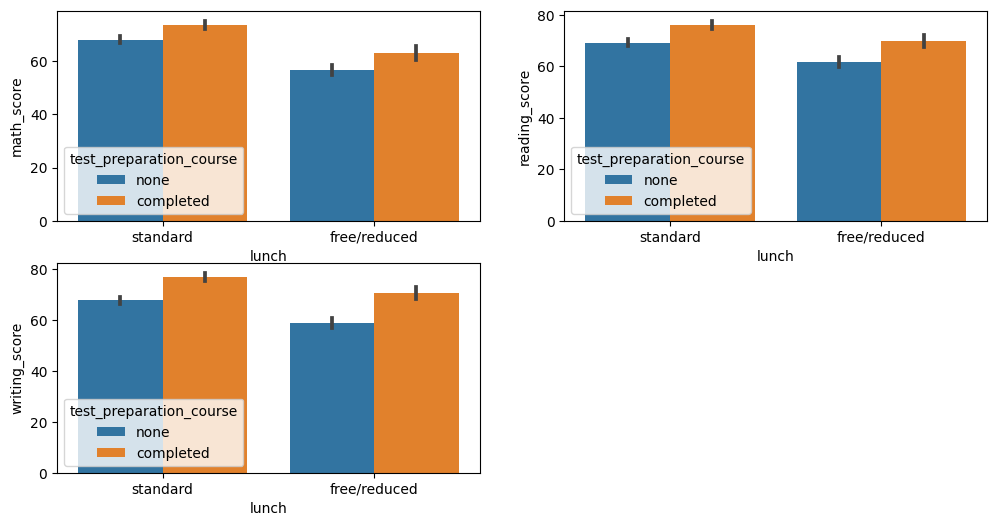

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Observation  
`Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course`

#### 4.4.6 CHECKING OUTLIERS

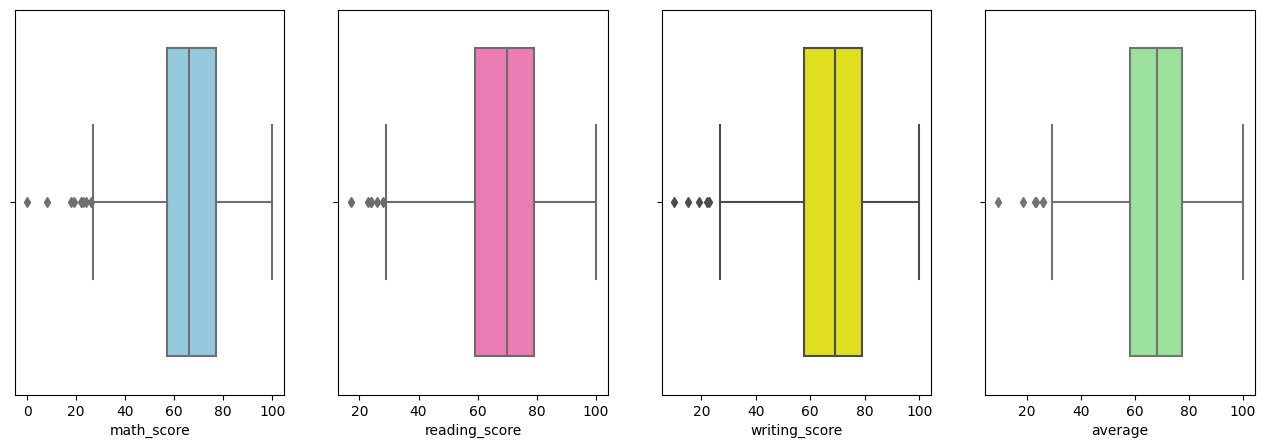

In [38]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

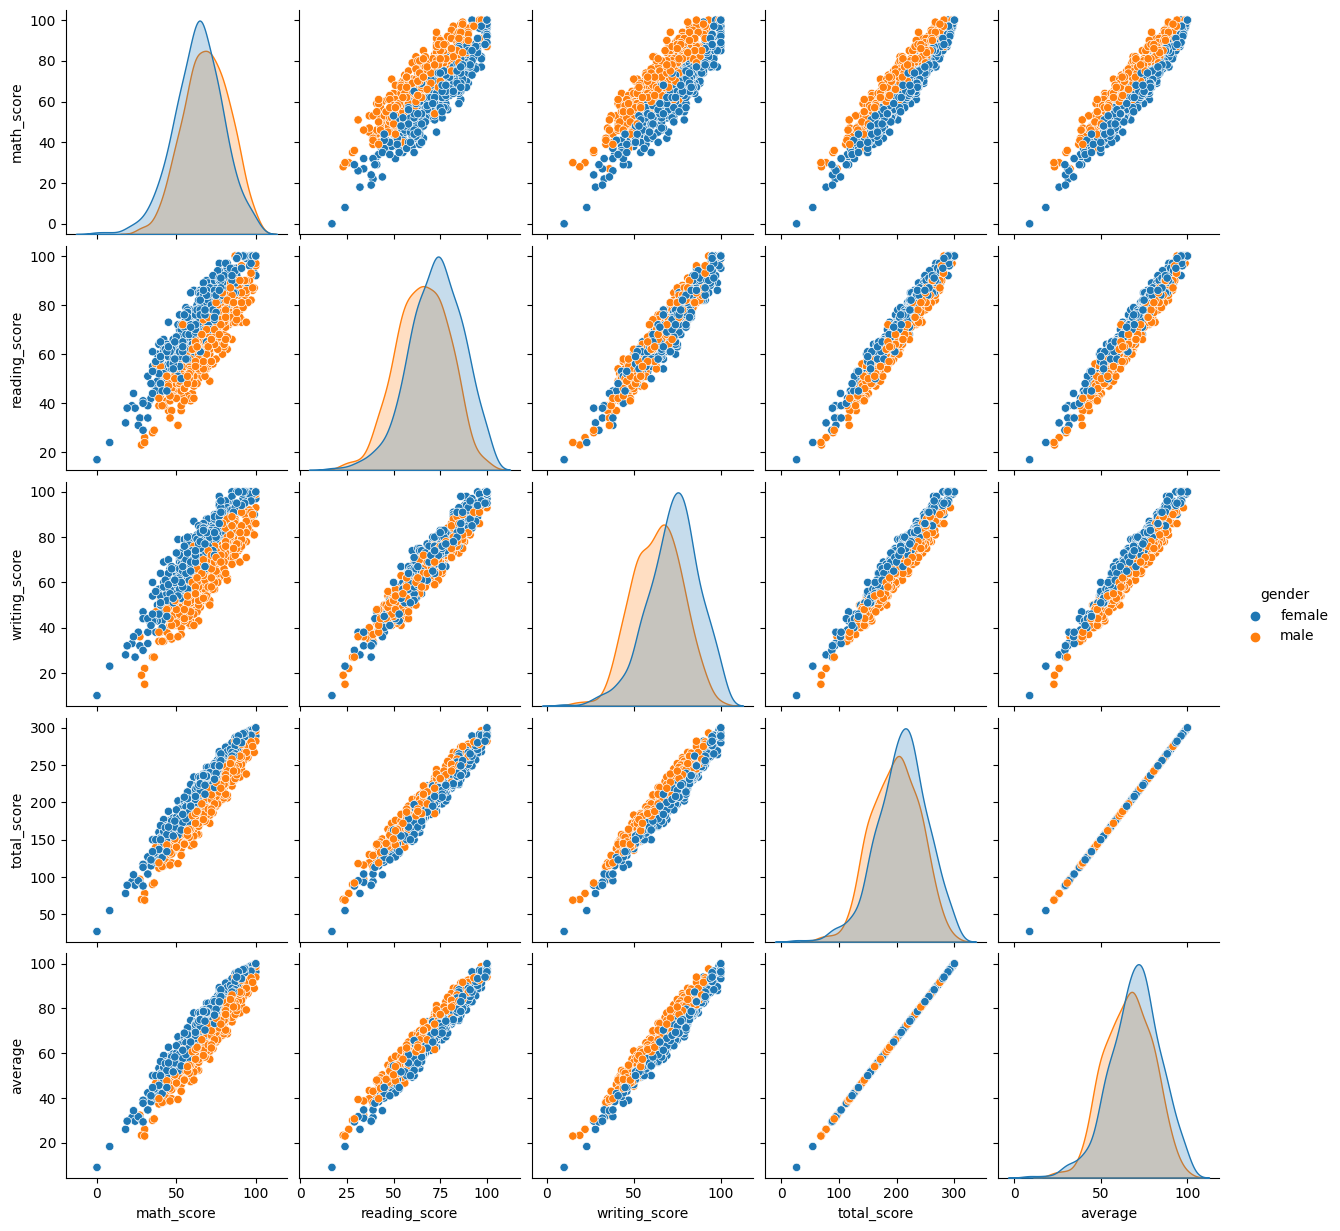

In [39]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Observation
`From the above plot it is clear that all the scores increase linearly with each other.`

## 5. Conclusions
`Student's Performance is related with lunch, race, parental level education`  
`Females lead in pass percentage and also are top-scorers`  
`Student's Performance is not much related with test preparation course`  
`Finishing preparation course is benefitial.`  